In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# global imports
import sys
import numpy as np
import pandas as pd
import time
import pickle
from os import path
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

# local imports
import utils

# general settings  
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('axes', edgecolor='k')
plt.rc('xtick.major', width=2)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', width=2)
plt.rc('ytick.major', size=6)
plt.rc('pdf', fonttype=42)
plt.rc('ps', fonttype=42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
### parameters
subset_string = 'subset1'
subset = utils.get_attributes(subset_string)
# remove PR from states
states = sorted(list(set(utils.states)-{'PR'}))
nstates = len(states)
print('nstates', nstates)
state2pos = {s:i for i, s in enumerate(states)}
# load distances (see calculate_distances.ipynb)
dists = pickle.load( open("results/distances.pkl", "rb" ) )
# restrict to subset and states
dists = { k:{att:d for att, d in v.items() if att in subset} for k, v in dists.items() if k[0] in states and k[1] in states}

nstates 50


In [3]:
# load results
def load_res(fname, met):
    results = []
    for filename in glob.glob(fname + "_" + met + "/results_*.pkl"):
        print(filename)
        result = pickle.load( open( filename, "rb" ) )
        results.extend(result)
    return results
acc_res8 = load_res("results/mp_05_td_8", "acc")
#acc_res3 = load_res("results/mp_05_td_3", "acc")
acc_res2 = load_res("results/mp_05_td_2", "acc")
acc_res1 = load_res("results/mp_05_td_1", "acc")
dp_res8 = load_res("results/mp_05_td_8", "dp")
dp_res2 = load_res("results/mp_05_td_2", "dp")
dp_res1 = load_res("results/mp_05_td_1", "dp")
eop_res8 = load_res("results/mp_05_td_8", "eop")
eop_res2 = load_res("results/mp_05_td_2", "eop")
eop_res1 = load_res("results/mp_05_td_1", "eop")

results/mp_05_td_8_acc\results_0_1_subset1.pkl
results/mp_05_td_8_acc\results_10_11_subset1.pkl
results/mp_05_td_8_acc\results_11_12_subset1.pkl
results/mp_05_td_8_acc\results_12_13_subset1.pkl
results/mp_05_td_8_acc\results_13_14_subset1.pkl
results/mp_05_td_8_acc\results_14_15_subset1.pkl
results/mp_05_td_8_acc\results_15_16_subset1.pkl
results/mp_05_td_8_acc\results_16_17_subset1.pkl
results/mp_05_td_8_acc\results_17_18_subset1.pkl
results/mp_05_td_8_acc\results_18_19_subset1.pkl
results/mp_05_td_8_acc\results_19_20_subset1.pkl
results/mp_05_td_8_acc\results_1_2_subset1.pkl
results/mp_05_td_8_acc\results_20_21_subset1.pkl
results/mp_05_td_8_acc\results_21_22_subset1.pkl
results/mp_05_td_8_acc\results_22_23_subset1.pkl
results/mp_05_td_8_acc\results_23_24_subset1.pkl
results/mp_05_td_8_acc\results_24_25_subset1.pkl
results/mp_05_td_8_acc\results_25_26_subset1.pkl
results/mp_05_td_8_acc\results_26_27_subset1.pkl
results/mp_05_td_8_acc\results_27_28_subset1.pkl
results/mp_05_td_8_acc\r

results/mp_05_td_8_dp\results_22_23_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_23_24_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_24_25_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_25_26_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_26_27_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_27_28_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_28_29_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_29_30_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_2_3_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_30_31_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_31_32_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_32_33_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_33_34_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_34_35_subset1_demographic_parity.pkl
results/mp_05_td_8_dp\results_35_36_subset1_demographic_parity.p

results/mp_05_td_1_dp\results_43_44_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_44_45_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_45_46_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_46_47_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_47_48_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_48_49_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_49_50_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_4_5_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_50_51_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_5_6_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_6_7_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_7_8_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_8_9_subset1_demographic_parity.pkl
results/mp_05_td_1_dp\results_9_10_subset1_demographic_parity.pkl
results/mp_05_td_8_eop\results_0_1_subset1_true_positive_rate_parity.pkl


results/mp_05_td_2_eop\results_8_9_subset1_true_positive_rate_parity.pkl
results/mp_05_td_2_eop\results_9_10_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_0_1_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_10_11_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_11_12_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_12_13_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_13_14_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_14_15_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_15_16_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_16_17_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_17_18_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_18_19_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results_19_20_subset1_true_positive_rate_parity.pkl
results/mp_05_td_1_eop\results

In [4]:
# sample
[{k:v for k, v in r.items() if k != 'clf'} for r in acc_res8 if r['source']=='AL' and r['target']=='OR']

[{'source': 'AL',
  'target': 'OR',
  'max_depth': 8,
  'alpha': None,
  'subset': ['SCHL', 'MAR', 'AGEP', 'SEX', 'CIT', 'RAC1P'],
  't_o': None,
  'cm': array([[2276,  132],
         [1056,  205]], dtype=int64),
  'cm_unprotected': array([[934,  55],
         [481, 105]], dtype=int64),
  'maxdepth_td': 8,
  'min_pct': 0.05,
  'att_td': 'MAR',
  'cm_protected': array([[1342,   77],
         [ 575,  100]], dtype=int64)},
 {'source': 'AL',
  'target': 'OR',
  'max_depth': 8,
  'alpha': 0,
  'subset': ['SCHL', 'MAR', 'AGEP', 'SEX', 'CIT', 'RAC1P'],
  't_o': None,
  'cm': array([[2304,  104],
         [1083,  178]], dtype=int64),
  'cm_unprotected': array([[944,  45],
         [495,  91]], dtype=int64),
  'maxdepth_td': 8,
  'min_pct': 0.05,
  'att_td': 'MAR',
  'cm_protected': array([[1360,   59],
         [ 588,   87]], dtype=int64)}]

In [5]:
# sample
[{k:v for k, v in r.items() if k != 'clf'} for r in acc_res1 if r['source']=='AL' and r['target']=='OR']

[{'source': 'AL',
  'target': 'OR',
  'max_depth': 8,
  'alpha': None,
  'subset': ['SCHL', 'MAR', 'AGEP', 'SEX', 'CIT', 'RAC1P'],
  't_o': None,
  'cm': array([[2276,  132],
         [1056,  205]], dtype=int64),
  'cm_unprotected': array([[934,  55],
         [481, 105]], dtype=int64),
  'maxdepth_td': 1,
  'min_pct': 0.05,
  'att_td': 'MAR',
  'cm_protected': array([[1342,   77],
         [ 575,  100]], dtype=int64)},
 {'source': 'AL',
  'target': 'OR',
  'max_depth': 8,
  'alpha': 0,
  'subset': ['SCHL', 'MAR', 'AGEP', 'SEX', 'CIT', 'RAC1P'],
  't_o': None,
  'cm': array([[2296,  112],
         [1075,  186]], dtype=int64),
  'cm_unprotected': array([[938,  51],
         [492,  94]], dtype=int64),
  'maxdepth_td': 1,
  'min_pct': 0.05,
  'att_td': 'MAR',
  'cm_protected': array([[1358,   61],
         [ 583,   92]], dtype=int64)}]

In [6]:
x8 = [ (r['source'], r['target'], r['cm']) for r in sorted(acc_res8, key=lambda x: (x['source'] + x['target'])) if r['alpha'] is None and r['source'] != r['target']]
x1 = [ (r['source'], r['target'], r['cm']) for r in sorted(acc_res1, key=lambda x: (x['source'] + x['target'])) if r['alpha'] is None and r['source'] != r['target']]

In [7]:
for a,b in zip(x8, x1):
    if not np.array_equal(a[2], b[2]):
        print(a,b )

In [8]:
# find specific results
def cond(l, source=None, target=None, alpha=1, subset=subset):
    return [r for r in l if (source is None or (r['source']==source)) and\
            (target is None or (r['target']==target)) and\
            (r['alpha']==alpha) and (r['subset']==subset)]

# build metric matrix
def metric_m(results, met, alpha=0, kind='alpha_rel', diag=False):
    res = np.zeros((nstates, nstates))
    for i, source in enumerate(states):
        for j, target in enumerate(states):
            if i==j and not diag:
                res[i, j] = np.NaN
                continue
            target_target = cond(results, source=target, target=target, alpha=None)
            source_target = cond(results, source=source, target=target, alpha=None)
            source_target_alpha = cond(results, source=source, target=target, alpha=alpha)
            if len(target_target)==1 and len(source_target)==1 and len(source_target_alpha)==1:
                target_target_v = utils.get_metric(target_target[0], met)
                source_target_v = utils.get_metric(source_target[0], met)
                source_target_alpha_v = utils.get_metric(source_target_alpha[0], met)                    
                mi = min(target_target_v, source_target_v)
                ma = max(target_target_v, source_target_v)
                if kind=='alpha_rel':
                    if mi  != ma:
                        dif = (source_target_alpha_v-mi) if met == 'acc' else (ma-source_target_alpha_v)
                        rel = dif/(ma  - mi)*100
                        res[i, j] = (rel if rel >= -100 else -100) if rel <= 100 else 100
                    else:
                        res[i, j] = 100 if source_target_alpha_v >= mi else -100
                elif kind=='alpha_abs':
                    res[i, j] = (source_target_alpha_v - target_target_v)*100
                elif kind=='st_abs':
                    res[i, j] = (source_target_v - target_target_v)*100
                else:
                    raise BaseException("unknown kind", kind)
            else:
                raise BaseException("error {} {} {} {}".format(source, target, len(target_target), len(source_target), len(source_target_alpha)))
    return res

In [9]:
acc_st = metric_m(acc_res8, 'acc', kind='st_abs')
acc_alpha0 = metric_m(acc_res8, 'acc', kind='alpha_rel')
acc_alpha0_1 = metric_m(acc_res1, 'acc', kind='alpha_rel')
acc_alpha0_2 = metric_m(acc_res2, 'acc', kind='alpha_rel')
#acc_alpha0_3 = metric_m(acc_res3, 'acc', kind='alpha_rel')
#acc_alpha0_st = metric_m(acc_res8, 'acc', kind='alpha_abs')

dp_st = metric_m(dp_res8, 'dp', kind='st_abs')
dp_alpha0 = metric_m(dp_res8, 'dp', kind='alpha_rel')
dp_alpha0_1 = metric_m(dp_res1, 'dp', kind='alpha_rel')
dp_alpha0_2 = metric_m(dp_res2, 'dp', kind='alpha_rel')

eop_st = metric_m(eop_res8, 'eop', kind='st_abs')
eop_alpha0 = metric_m(eop_res8, 'eop', kind='alpha_rel')
eop_alpha0_1 = metric_m(eop_res1, 'eop', kind='alpha_rel')
eop_alpha0_2 = metric_m(eop_res2, 'eop', kind='alpha_rel')

In [10]:
states[0], states[1], dp_alpha0, dp_alpha0_1

('AK',
 'AL',
 array([[          nan, -100.        , -100.        , ...,   75.49885509,
         -100.        ,  -84.01775805],
        [   0.        ,           nan,    0.        , ...,  100.        ,
          -18.81638847,  -48.25174825],
        [-100.        ,  100.        ,           nan, ..., -100.        ,
         -100.        ,   99.04875149],
        ...,
        [ 100.        ,  -16.77993652,   34.38113716, ...,           nan,
           39.91576219,   36.55913978],
        [-100.        ,   61.91145721,  -69.87631606, ...,    9.14532294,
                   nan,    0.        ],
        [ 100.        ,  100.        ,  100.        , ...,  100.        ,
          100.        ,           nan]]),
 array([[          nan, -100.        , -100.        , ...,  100.        ,
         -100.        ,   53.38512764],
        [   0.        ,           nan, -100.        , ...,  100.        ,
          -18.81638847,  -48.25174825],
        [  23.32123412,  100.        ,           nan, ..., 

In [11]:
# better, equal cases, avg
np.mean(acc_alpha0>0), np.mean(acc_alpha0==0), np.nanmean(acc_alpha0)

(0.4776, 0.264, 16.58690555370155)

In [12]:
from scipy import stats

if False:
    data1 = st_abs.flatten()
    data1 = data1[~np.isnan(data1)]
    print(np.mean(data1))
    print(stats.ttest_1samp(data1, popmean=0))
    sns.kdeplot(np.array(data1), bw_method=0.5)

    data2 = alpha_abs.flatten()
    data2 = data2[~np.isnan(data2)]
    print(np.mean(data2))
    print(stats.ttest_1samp(data2, popmean=0))
    sns.kdeplot(np.array(data2), bw_method=0.5)
    plt.show()

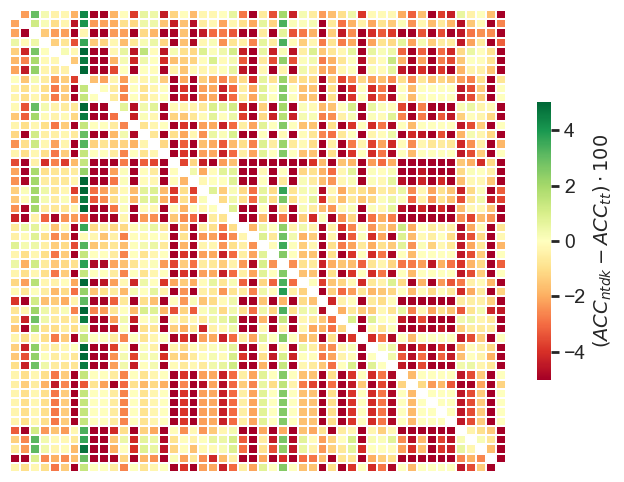

In [13]:
# red points = degrade in accuracy 
label = "$(ACC_{ntdk}-ACC_{tt})\cdot 100$"
_, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(acc_st,xticklabels=False, yticklabels = False, #row_cluster=cluster, col_cluster=cluster,
                    cbar_kws={'label': label, 'shrink':0.6}, center=0, vmin=-5, vmax=5,
                    linewidths= 0.25, cmap="RdYlGn")
plt.savefig('fig2acc.png', bbox_inches='tight', dpi=400)
plt.show()

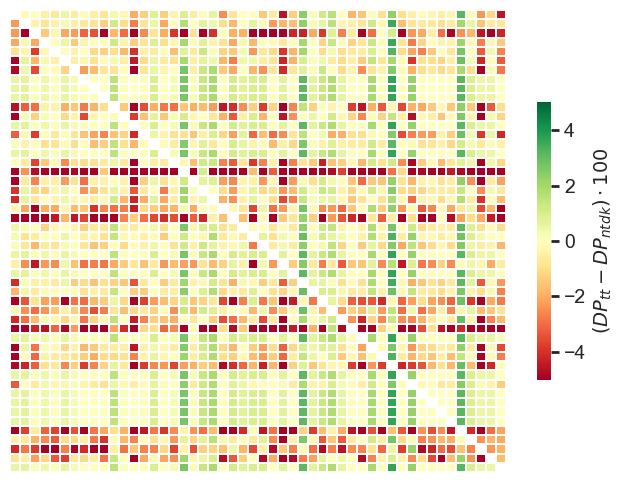

In [14]:
# red points = degrade dp difference
label = "$(DP_{tt}-DP_{ntdk})\cdot 100$" #if met=='dp' else "$EOP_{ntdk}-EOP_{tt}$")
_, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(-dp_st,xticklabels=False, yticklabels = False, #row_cluster=cluster, col_cluster=cluster,
                    cbar_kws={'label': label, 'shrink':0.6}, center=0, vmin=-5, vmax=5,
                    linewidths= 0.25, cmap="RdYlGn")
plt.savefig('fig2dp.png', bbox_inches='tight', dpi=400)
plt.show()

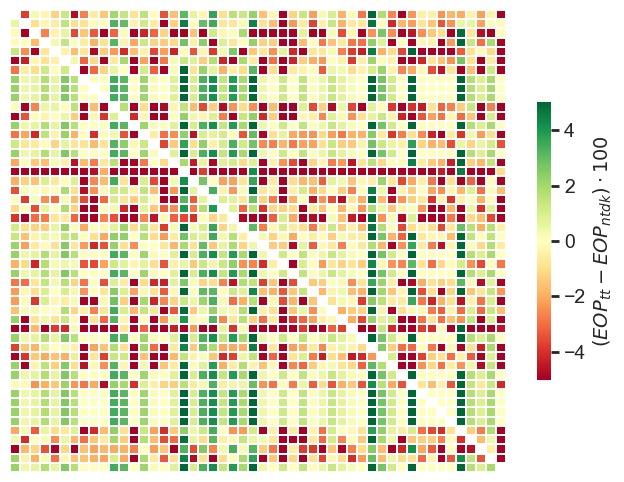

In [15]:
# red points = degrade EOP difference
label = "$(EOP_{tt}-EOP_{ntdk})\cdot 100$"
_, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(-eop_st,xticklabels=False, yticklabels = False, #row_cluster=cluster, col_cluster=cluster,
                    cbar_kws={'label': label, 'shrink':0.6}, center=0, vmin=-5, vmax=5,
                    linewidths= 0.25, cmap="RdYlGn")
plt.savefig('fig2eop.png', bbox_inches='tight', dpi=400)
plt.show()

In [16]:
# compute dimensions of analysis
def sim(k, d, agg=np.mean, att=None):
    atts = dists[k]
    if att is None:
        return agg([v[d] for v in atts.values()])
    return atts[att][d]

def calc_agg(results, df):
    res = []
    for k in dists:
        sr, tg = k
        if sr in states and tg in states and sr != tg:
            res.append(
                { 'source':sr, 
                  'target':tg,
                  'ssize':dists[(sr, tg)]['AGEP']['len_s_train'], # 'AGEP' or any other att
                  'tsize':dists[(sr, tg)]['AGEP']['len_t_train'],
                  'avg_d_att':sim(k, 'd_att'),
                  'avg_d_y_cond':sim(k, 'd_y_cond'),
                  'avg_d_splits':sim(k, 'd_splits'),
                  'min_d_y_cond':sim(k, 'd_y_cond', np.min),
                  'tree_w_cond_dist_no_corr':cond(results, source=sr, target=tg, alpha=None)[0]['clf'].w_dist(),
                  'tree_w_cond_dist_alpha_0':cond(results, source=sr, target=tg, alpha=0)[0]['clf'].w_dist(),
                  'dif':df[state2pos[sr], state2pos[tg]]
                }
            )
    return res

In [17]:
%%time
acc_agg = calc_agg(results=acc_res8, df=acc_alpha0)
acc_agg1 = calc_agg(results=acc_res1, df=acc_alpha0_1)
acc_agg2 = calc_agg(results=acc_res2, df=acc_alpha0_2)
#acc_agg3 = calc_agg(results=acc_res3, df=acc_alpha0_3)
dp_agg = calc_agg(results=dp_res8, df=dp_alpha0)
dp_agg1 = calc_agg(results=dp_res1, df=dp_alpha0_1)
dp_agg2 = calc_agg(results=dp_res2, df=dp_alpha0_2)
eop_agg = calc_agg(results=eop_res8, df=eop_alpha0)
eop_agg1 = calc_agg(results=eop_res1, df=eop_alpha0_1)
eop_agg2 = calc_agg(results=eop_res2, df=eop_alpha0_2)

CPU times: total: 13min 30s
Wall time: 13min 31s


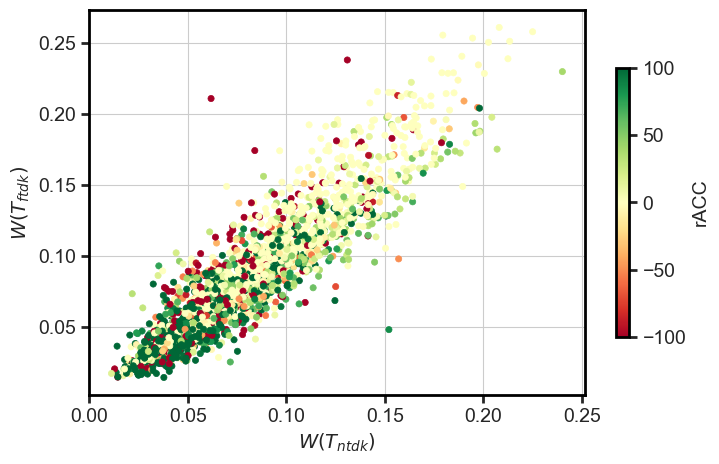

In [18]:
def plot_rel(res, label):
    tree_w_cond_dist_no_corr = np.array([v['tree_w_cond_dist_no_corr'] for v in res])
    tree_w_cond_dist_alpha_0 = np.array([v['tree_w_cond_dist_alpha_0'] for v in res])
    avg_d_att = np.array([v['avg_d_att'] for v in res])
    min_d_y_cond = np.array([v['min_d_y_cond'] for v in res])
    avg_d_splits = np.array([v['avg_d_splits'] for v in res])
    ssize = np.array([v['ssize'] for v in res])
    tsize = np.array([v['tsize'] for v in res])
    cs = np.array([v['dif'] for v in res])
    xs = tree_w_cond_dist_no_corr
    ys = tree_w_cond_dist_alpha_0
    _, ax = plt.subplots(figsize=(8, 5))
    plt.scatter(xs, ys, c=cs, linewidths = .5, marker ="o", cmap="RdYlGn", s=20, norm=TwoSlopeNorm(0, -100, 100))
    #ax.plot([0, .25], [0, .25])
    plt.colorbar(label=label, orientation="vertical", shrink=0.7)
    plt.xlabel('$W(T_{ntdk})$')
    plt.ylabel('$W(T_{ftdk})$')
    plt.savefig('fig3'+label+'.png', bbox_inches='tight', dpi=400)
    plt.show()
    return xs, ys, cs, min_d_y_cond

acc_xs, acc_ys, acc_cs, acc_ds = plot_rel(acc_agg, label="rACC")

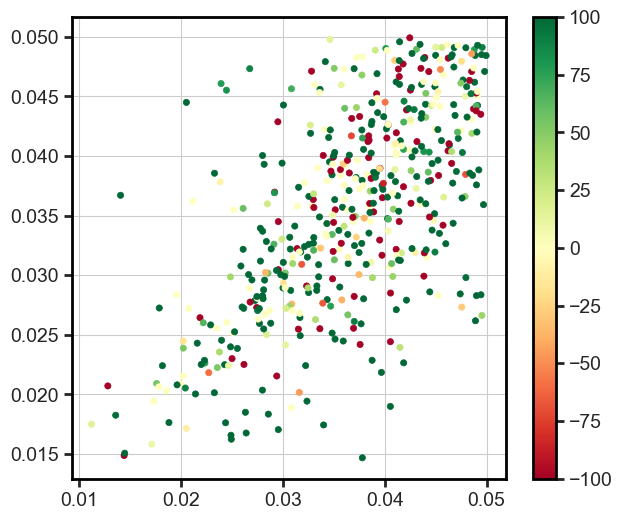

In [19]:
def plot_res_zoom(xs, ys, cs):
    pos = np.where( (xs < .05) & (ys < .05) )[0]
    xs1 = xs[pos]
    ys1 = ys[pos]
    cs1 = cs[pos]

    _, ax = plt.subplots(figsize=(7, 6))
    plt.scatter(xs1, ys1, c=cs1, linewidths = .5, marker ="o", cmap="RdYlGn", s=20, norm=TwoSlopeNorm(0, -100, 100))
    plt.colorbar()
    plt.show()
    return xs1, ys1, cs1
    
_, _, acc_cs1 = plot_res_zoom(acc_xs, acc_ys, acc_cs)

16.58690555370155
Ttest_1sampResult(statistic=13.018247882851737, pvalue=1.6438299101182387e-37)
33.12154831583701
Ttest_1sampResult(statistic=10.007305356387024, pvalue=1.2827412807496674e-21)


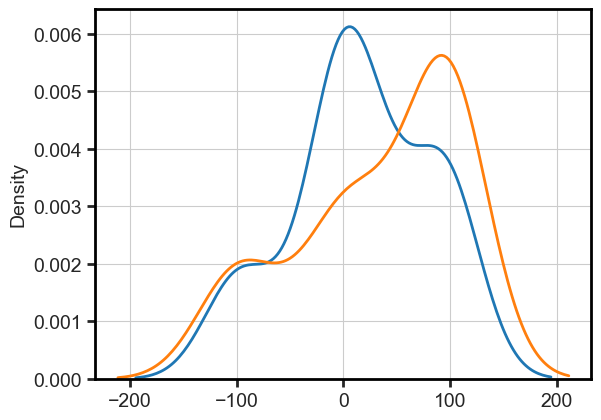

In [20]:
def plot_res_dist(cs, cs1):
    data1 = cs
    data1 = data1[~np.isnan(data1)]
    print(np.mean(data1))
    print(stats.ttest_1samp(data1, popmean=0))
    sns.kdeplot(np.array(data1), bw_method=0.5)

    data2 = cs1
    data2 = data2[~np.isnan(data2)]
    print(np.mean(data2))
    print(stats.ttest_1samp(data2, popmean=0))
    sns.kdeplot(np.array(data2), bw_method=0.5)
    plt.show()
    
plot_res_dist(acc_cs, acc_cs1)

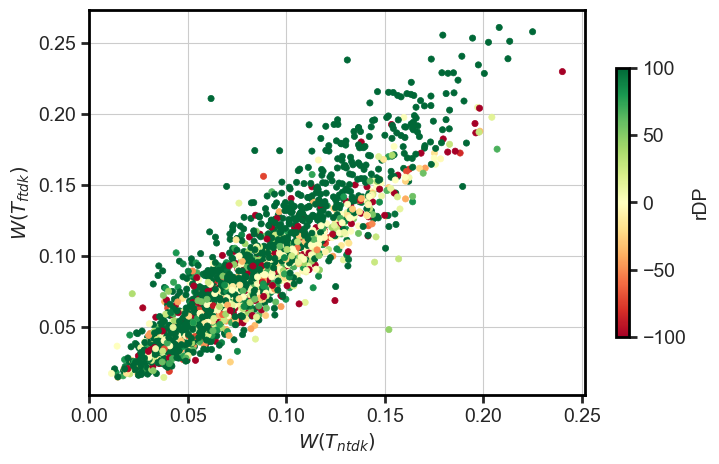

In [21]:
dp_xs, dp_ys, dp_cs, dp_ds = plot_rel(dp_agg, label="rDP")

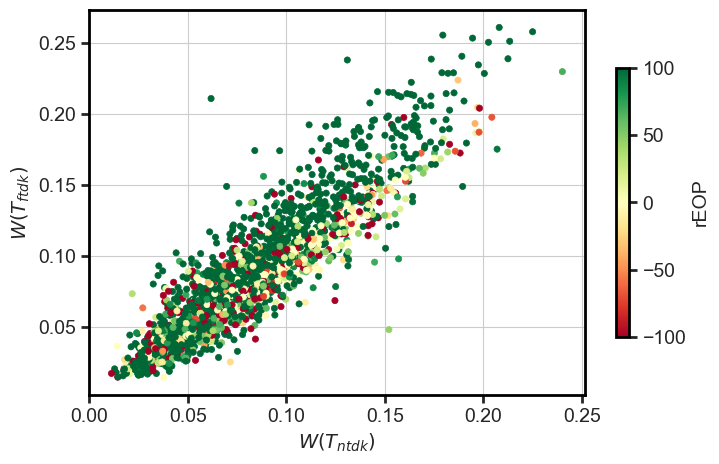

In [22]:
eop_xs, eop_ys, eop_cs, eop_ds = plot_rel(eop_agg, label="rEOP")

Mean rACC at $W(T_{ftdk})$ <= 0.03 41.83043803795655
Mean rACC at $W( \hat{P}^{X_w}(Y), P_T(Y) )$ <= 0.03 25.285894760496276


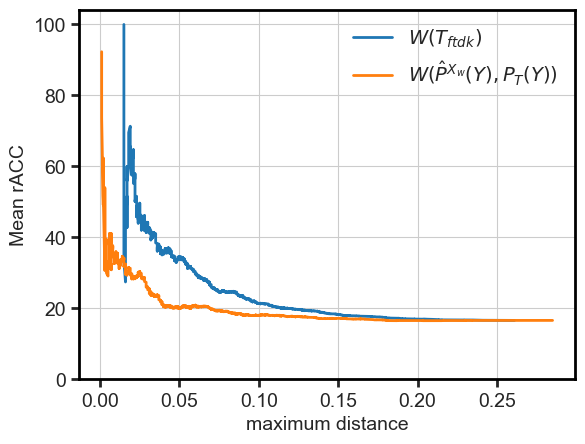

In [43]:
def plot_rel_p(xs, cs1, ys, cs2, ds, cs3, es=None, cs4=None, fname='unknown', xlabel='maximum distance', ylabel="Mean rACC", 
               label1='$W(T_{ntdk})$', label2='$W(T_{ftdk})$', label3='$W( \hat{P}^{X_w}(Y), P_T(Y) )$', 
               label4='unknown', thr=0.03):
    if xs is not None:
        sortby = np.round(xs, 3)
        pos = np.argsort(sortby)
        ns = range(1, 1+len(pos))
        posf = np.cumsum(cs1[pos])/ns
        plt.plot(sortby[pos], posf, label=label1)
        print(ylabel, 'at', label1, '<=', thr, posf[sum(sortby<=thr)])

    if ys is not None:
        sortby = np.round(ys, 3)
        pos = np.argsort(sortby)
        ns = range(1, 1+len(pos))
        posf = np.cumsum(cs2[pos])/ns
        plt.plot(sortby[pos], posf, label=label2)
        print(ylabel, 'at', label2, '<=', thr, posf[sum(sortby<=thr)])

    if ds is not None:
        sortby = np.round(ds, 3)
        pos = np.argsort(sortby)
        ns = range(1, 1+len(pos))
        posf = np.cumsum(cs3[pos])/ns
        plt.plot(sortby[pos], posf, label=label3)
        print(ylabel, 'at', label3, '<=', thr, posf[sum(sortby<=thr)])

    if es is not None:
        sortby = np.round(es, 3)
        pos = np.argsort(sortby)
        ns = range(1, 1+len(pos))
        posf = np.cumsum(cs4[pos])/ns
        plt.plot(sortby[pos], posf, label=label4)
        print(ylabel, 'at', label4, '<=', thr, posf[sum(sortby<=thr)])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')
    plt.ylim(0)
    plt.savefig('fig4'+fname+'.png', bbox_inches='tight', dpi=400)
    plt.show()
    
#plot_rel_p(acc_xs, acc_cs, acc_ys, acc_cs, acc_ds, acc_cs, fname="racc")
plot_rel_p(None, None, acc_ys, acc_cs, acc_ds, acc_cs, fname="racc")

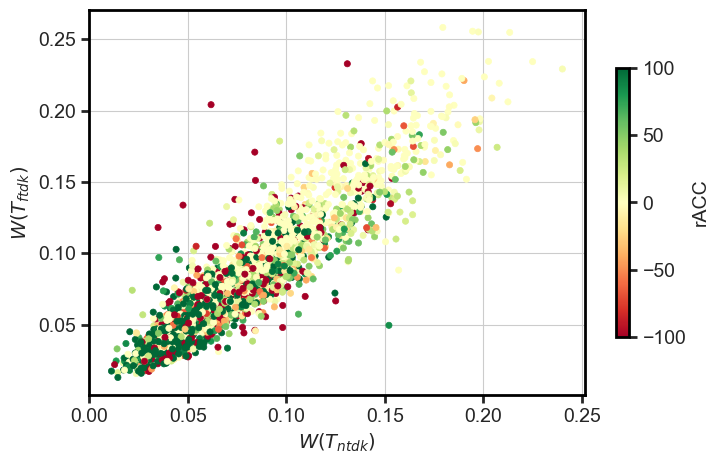

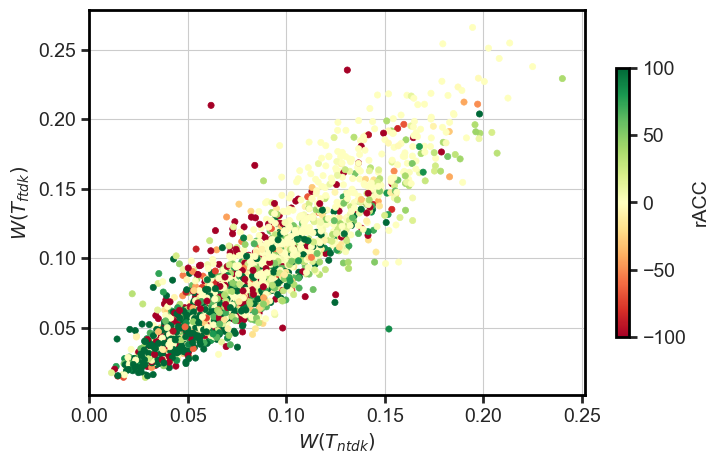

In [24]:
acc_xs1, acc_ys1, acc_cs1, acc_ds1 = plot_rel(acc_agg1, label="rACC")
acc_xs2, acc_ys2, acc_cs2, acc_ds2 = plot_rel(acc_agg2, label="rACC")
#acc_xs3, acc_ys3, acc_cs3, acc_ds3 = plot_rel(acc_agg3, label="rACC")

Mean rACC at na=8 <= 0.03 25.285894760496276
Mean rACC at na=3 <= 0.03 21.5943959049761
Mean rACC at na=2 <= 0.03 17.4934892541425


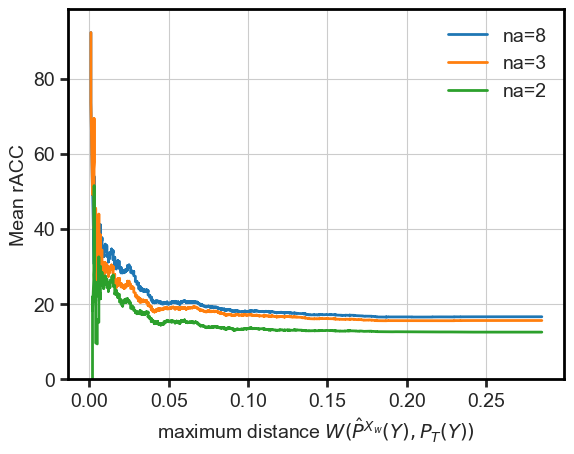

In [50]:
plot_rel_p(acc_ds, acc_cs, acc_ds2, acc_cs2, acc_ds1, acc_cs1, xlabel = 'maximum distance $W( \hat{P}^{X_w}(Y), P_T(Y) )$',
           fname="racc3", ylabel="Mean rACC", label1='na=8', label2='na=3', label3='na=2')

Mean rDP at $W(T_{ntdk})$ <= 0.03 50.09220118644346
Mean rDP at $W(T_{ftdk})$ <= 0.03 45.578937844669134
Mean rDP at $W( \hat{P}^{X_w}(Y), P_T(Y) )$ <= 0.03 41.78448109263892


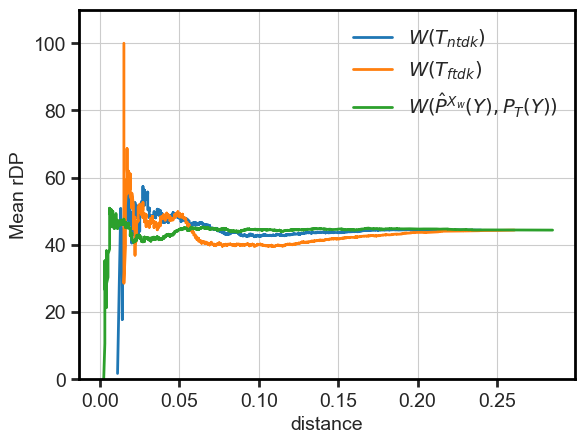

In [26]:
plot_rel_p(dp_xs, dp_cs, dp_ys, dp_cs, dp_ds, dp_cs, ylabel="Mean rDP", fname="rdp")

In [27]:
#plot_rel_p(dp_xs, dp_cs, dp_ys, dp_cs, dp_ds, dp_cs, ylabel='rDP', fname="rdp")

rACC-rDP-rEOP at rACC <= 0.03 25.285894760496276
rACC-rDP-rEOP at rDP <= 0.03 41.78448109263892
rACC-rDP-rEOP at rEOP <= 0.03 40.4185407603136


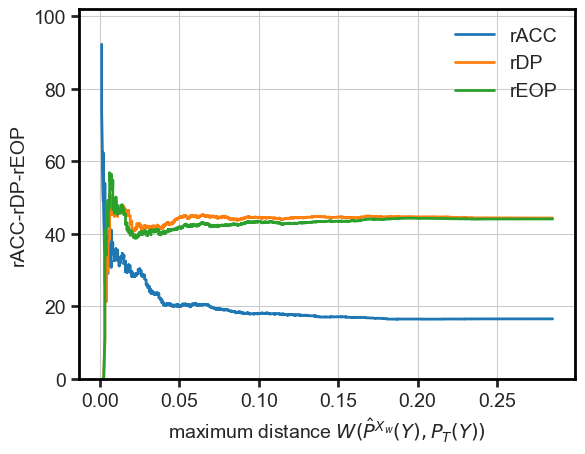

In [52]:
plot_rel_p(acc_ds, acc_cs, dp_ds, dp_cs, eop_ds, eop_cs, xlabel = 'maximum distance $W( \hat{P}^{X_w}(Y), P_T(Y) )$',
           fname='rrr', ylabel="rACC-rDP-rEOP", label1='rACC', label2='rDP', label3='rEOP')

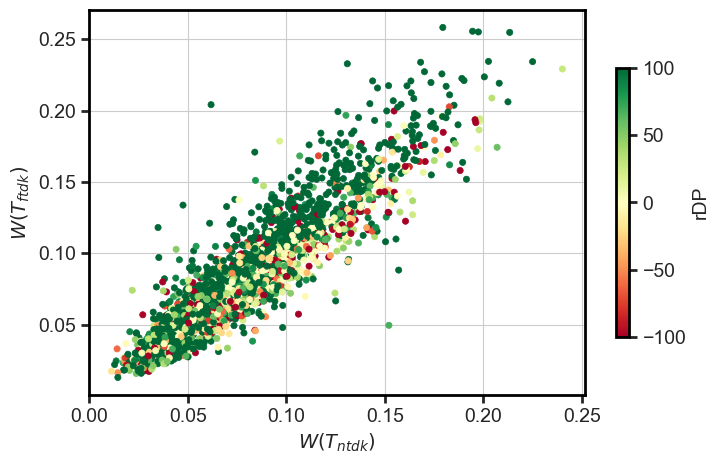

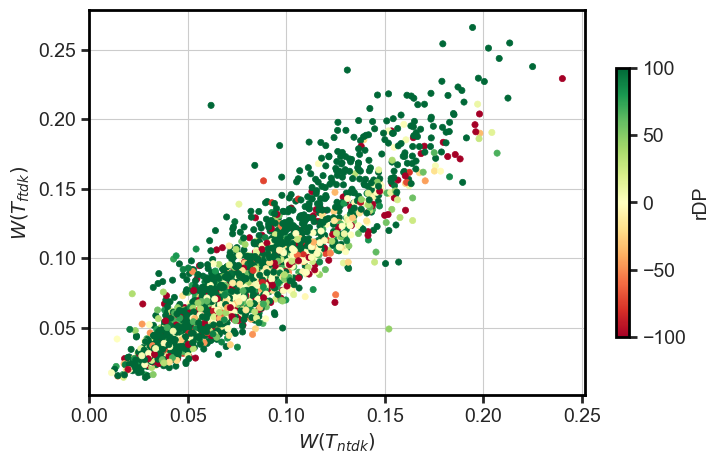

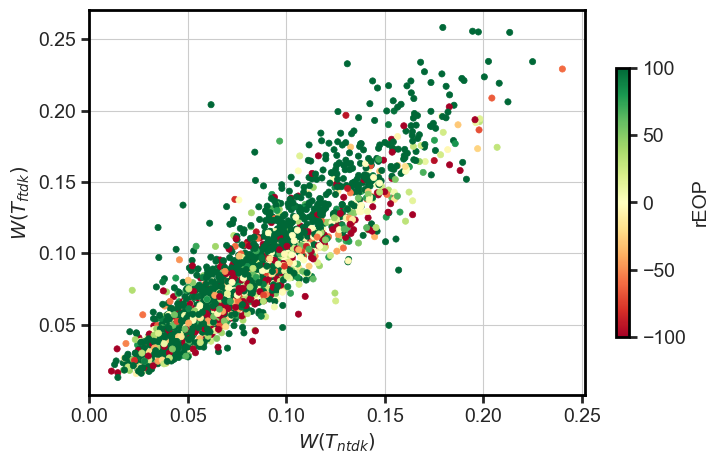

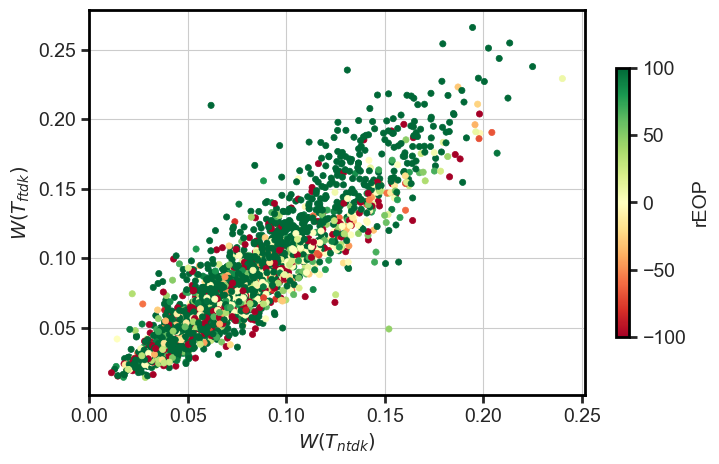

In [29]:
dp_xs1, dp_ys1, dp_cs1, dp_ds1 = plot_rel(dp_agg1, label="rDP")
dp_xs2, dp_ys2, dp_cs2, dp_ds2 = plot_rel(dp_agg2, label="rDP")
eop_xs1, eop_ys1, eop_cs1, eop_ds1 = plot_rel(eop_agg1, label="rEOP")
eop_xs2, eop_ys2, eop_cs2, eop_ds2 = plot_rel(eop_agg2, label="rEOP")

Mean rDP at na=8 <= 0.03 41.78448109263892
Mean rDP at na=3 <= 0.03 42.205622940489675
Mean rDP at na=2 <= 0.03 40.80743282463803


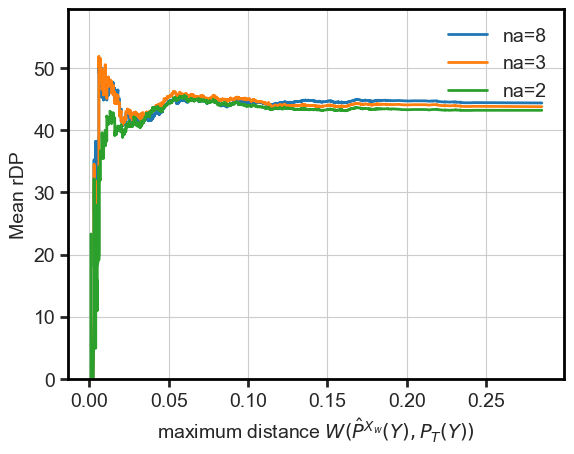

In [53]:
plot_rel_p(dp_ds, dp_cs, dp_ds2, dp_cs2, dp_ds1, dp_cs1, xlabel = 'maximum distance $W( \hat{P}^{X_w}(Y), P_T(Y) )$', 
           fname="rdp3", ylabel="Mean rDP", label1='na=8', label2='na=3', label3='na=2')

Mean rEOP at na=8 <= 0.03 40.4185407603136
Mean rEOP at na=3 <= 0.03 40.00157746772635
Mean rEOP at na=2 <= 0.03 41.059642468809955


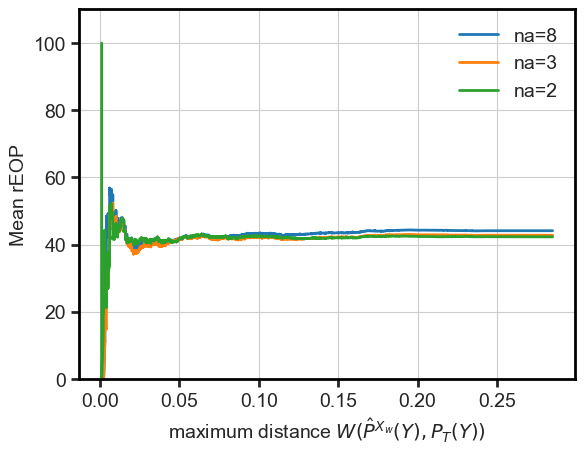

In [54]:
plot_rel_p(eop_ds, eop_cs, eop_ds2, eop_cs2, eop_ds1, eop_cs1, xlabel = 'maximum distance $W( \hat{P}^{X_w}(Y), P_T(Y) )$', 
           fname="reop3", ylabel="Mean rEOP", label1='na=8', label2='na=3', label3='na=2')

In [32]:
eop_ds, eop_cs, eop_ds2, eop_cs2, eop_ds1, eop_cs1

(array([0.08640342, 0.00057962, 0.02607493, ..., 0.10960719, 0.04486694,
        0.16407011]),
 array([  54.79183032, -100.        ,  100.        , ...,  100.        ,
         100.        ,  100.        ]),
 array([0.08640342, 0.00057962, 0.02607493, ..., 0.10960719, 0.04486694,
        0.16407011]),
 array([ -37.28724797, -100.        ,  100.        , ...,  100.        ,
         100.        ,  100.        ]),
 array([0.08640342, 0.00057962, 0.02607493, ..., 0.10960719, 0.04486694,
        0.16407011]),
 array([-100., -100., -100., ...,  100.,  100.,  100.]))